<a href="https://colab.research.google.com/github/stojanovskimilan/Machine-Learning-and-Deep-Learning/blob/main/Stochastic_and_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [4]:
scaled_Y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction


Mini Batch Gradient Descent

In [5]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, X.T) + b
    w_grad = -(2/total_samples) * (X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples) * np.sum(y_true-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    #MSE - Mean Squared Error
    cost = np.mean(np.square(y_true - y_predicted))

    if i % 10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
    
  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500) 
w, b, cost   


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

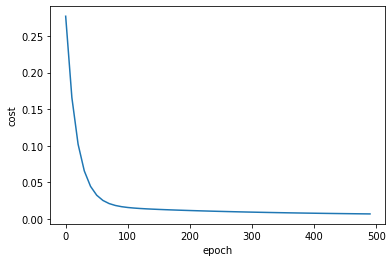

In [6]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [7]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.45484403267596

In [8]:
predict(1000,2,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


30.253094462442355

In [9]:
predict(1500,3,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


69.47860785714694

Stochastic Gradient Descent


In [15]:
import random
random.randint(0,6)

3

In [23]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y - y_predicted)
    if i % 100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
    
  return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),10000) 
w_sgd, b_sgd, cost_sgd   


(array([0.70501288, 0.67191849]), -0.22793141675793918, 0.02233479419485337)

In [24]:
w , b 

(array([0.70712464, 0.67456527]), -0.23034857438407427)

Stochastic Gradient Descent Epoch/Cost Plot

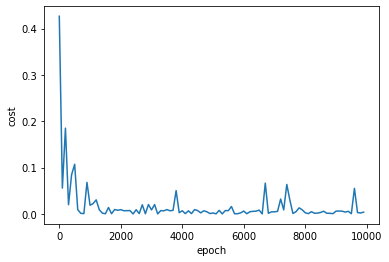

In [25]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [26]:
predict(2600,4,w_sgd, b_sgd) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.3362231966431

In [27]:
predict(1000,2,w_sgd, b_sgd)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


30.470420883708393

In [28]:
predict(1500,3,w_sgd, b_sgd)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


69.55745253495716